# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
#ascertain what elements are in citipy library
print(dir(citipy))

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination (citipy-specific functions)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#URL syntax for OpenWeather api call
ow_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
#will need additional URL for loop querying by city id + city

#placeholders for loop retrievals
city_num = []
city_name = []
countries = []
date = []
max_temp = []
humidity = []
windy = []
cloudy = []
latitude=[]
longitude =[]

#using city in citipy cities list, query openweather via api call syntax to obtain and hold weather data for each
for city in cities:
    data = requests.get(ow_url).json()
    #create query url
    ow_query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    response = requests.get(ow_query_url).json()
    
    try:  
        city_id = response['id']
        city_num.append(city_id)
        citynm = response['name']
        city_name.append(citynm)
        today_date = response['dt']
        date.append(today_date)
        country_code = response['sys']['country']
        countries.append(country_code)
        temp = response['main']['temp_max']
        max_temp.append(temp)
        hum = response['main']['humidity']
        humidity.append(hum)
        wind = response['wind']['speed']
        windy.append(wind)
        cloud = response['clouds']['all']
        cloudy.append(cloud)
        lat = response['coord']['lat']
        latitude.append(lat)
        lng = response['coord']['lon']
        longitude.append(lng)

    except KeyError:
        print(city_id, city)

3369157 belushya guba
3874787 tsihombe
5855927 tumannyy
2175403 taolanaro
3366880 karakendzha
3424607 acarau
5106834 ziyamet
552862 gorno-chuyskiy
2022572 illoqqortoormiut
4267710 bengkulu
3456642 yirol
286621 bolshaya chernigovka
286621 mys shmidta
2037252 kamenskoye
3471451 goteborg
2142316 bandar maharani
3870243 duz
1806840 disna
6113406 amderma
6113406 sakakah
64814 saleaula
2996180 fort saint john
3593500 krasnoselkup
3593500 barentsburg
4845585 samalaeulu
867006 ruatoria
3437029 nizhneyansk
885800 jiddah
6295855 sentyabrskiy
3359638 grand river south east
3382160 asfi
6096551 karauzyak
459201 samusu
1492948 mormugao
3453439 higuey
1257771 tahta
1489962 attawapiskat
2236967 aflu
2638419 acuna
1646170 meyungs
2669047 crab hill
236844 macaboboni
1497337 fianga
1497337 jabiru
2063042 malakal
5960603 vaitupu
3838233 zolotinka
1223738 kawana waters
921786 daxian
2063036 kuala krai
2012956 makung
1283285 falealupo
1862505 paradwip
1789289 marcona
2013279 toliary
2120591 camana
2128815 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create a data frame to capture city, latitude, temperature (f), humidity (%), cloudiness (%) and windspeed (mph); check loop totals
city_weather_df = pd.DataFrame({"City": city_name, "Cloudiness": cloudy,"Country": countries, "Date": date, "Humidity": humidity, "Lat": latitude,"Lng": longitude, "Max Temp": max_temp, "Wind Speed": windy})
city_weather_df.count()

City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Lat           567
Lng           567
Max Temp      567
Wind Speed    567
dtype: int64

In [10]:
city_weather_df = pd.DataFrame({"City": city_name, "Cloudiness": cloudy,"Country": countries, "Date": date, "Humidity": humidity, "Lat": latitude,"Lng": longitude, "Max Temp": max_temp, "Wind Speed": windy})
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,0,CL,1565574772,68,-53.16,-70.91,30.20,9.17
1,Quang Ngai,99,VN,1565574757,60,15.12,108.80,88.72,1.59
2,Dikson,100,RU,1565574838,89,73.51,80.55,40.47,11.10
3,Rikitea,100,PF,1565574838,84,-23.12,-134.97,72.87,17.20
4,Russell,1,US,1565574839,70,38.90,-98.86,91.40,14.99


In [11]:
#export dataframe to csv
city_weather_df = city_weather_df.dropna()
city_weather_df.to_csv('../Data/output_data_file.csv')

# Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

In [12]:
#Your objective is to build a series of scatter plots to showcase the following relationships

#assign date and time to scatterplot analyses
import time
here_and_now = time.ctime(today_date)
print(here_and_now)

Sun Aug 11 21:58:40 2019


# Latitude vs. Temperature Plot

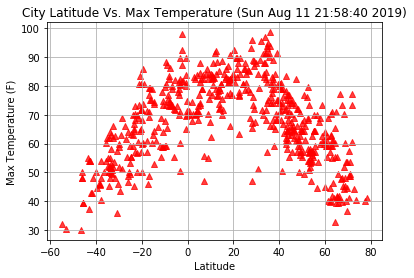

In [13]:
#Temperature (F) vs. Latitude
plt.scatter(latitude, max_temp, marker="^", facecolors="red", alpha=0.75)
plt.grid(linestyle='-')
x_lim = 100
plt.title("City Latitude Vs. Max Temperature" + " " +"("+ here_and_now+")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.show()

In [14]:
#save above plot to a .png file
plt.savefig("../Results/City_latitude_Vs_Max_Temperature.png")

<Figure size 432x288 with 0 Axes>

# Latitude vs. Humidity Plot

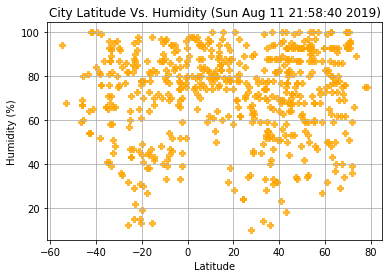

In [15]:
#Humidity (%) vs. Latitude
plt.scatter(latitude, humidity, marker="P", facecolors="orange", alpha=0.75)
plt.grid(linestyle='-')
x_lim = 100
plt.title("City Latitude Vs. Humidity" + " " +"("+ here_and_now+")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../Results/City_latitude_Vs_Humidity.png")
plt.show()

# Latitude vs. Cloudiness Plot

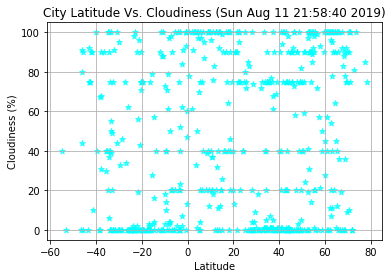

In [16]:
#Cloudiness (%) vs. Latitude
plt.scatter(latitude, cloudy, marker="*", facecolors="aqua", alpha=0.75)
plt.grid(linestyle='-')
x_lim = 100
plt.title("City Latitude Vs. Cloudiness" + " " +"("+ here_and_now+")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("../Results/City_latitude_Vs_Cloudiness.png")
plt.show()

# Latitude vs. Wind Speed Plot

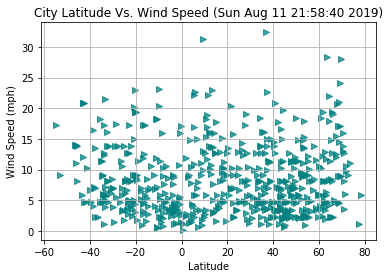

In [17]:
#Wind Speed (mph) vs. Latitude
plt.scatter(latitude, windy, marker=">", facecolors="teal", alpha=0.75)
plt.grid(linestyle='-')
x_lim = 100
plt.title("City Latitude Vs. Wind Speed" + " " +"("+ here_and_now+")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("../Results/City_latitude_Vs_Windspeed.png")
plt.show()

# Findings

In [18]:
#You must include a written description of three observable trends based on the data.

--Temperature is pretty dramatically higher near and just above the equator, but it seems others of these are less significant an will change each time the api is called and the code run.